In [1]:
import numpy as np 
import pandas as pd 
from classLib_yash import *
import random

import matplotlib.pyplot as plt

In [2]:

randompoints= [] # generating random point between 0 and 1
for i in range(1000): 
    a=[np.round(random.random(),4), np.round(random.random(),4)]
    randompoints.append(a)
allWaypoint = [] #here selecting the points which have a distance of more than 'a' 
for j in range(len(randompoints)):
    a=[]
    for k in range(j+1,len(randompoints)):
        s=np.linalg.norm(np.array(randompoints[j])-np.array(randompoints[k])) # not efficient way to claculate distance of one point from all others
        a.append(s)
    if all(i>0.16 for i in a):
        allWaypoint.append(randompoints[j])
print('no of waypoints:', len(allWaypoint))
wpList = allWaypoint[:15] #need 15 waypoints

wpList=np.round(wpList,4)
print(wpList, len(wpList))


no of waypoints: 14
[[0.0252 0.005 ]
 [0.7482 0.9356]
 [0.6113 0.6602]
 [0.9254 0.9973]
 [0.0282 0.7361]
 [0.4473 0.1004]
 [0.2424 0.0713]
 [0.69   0.4793]
 [0.4442 0.3841]
 [0.5375 0.8532]
 [0.2075 0.4009]
 [0.6481 0.2758]
 [0.2074 0.8284]
 [0.3742 0.9306]] 14


In [3]:
wpN = ['wpA','wpB','wpC','wpD','wpE','wpF','wpG','wpH','wpI', 'wpJ','wpK','wpL','wpM', 'wpN','wpO','wpP']
wpNameList=wpN[:len(wpList)]
waypointList =[]
for i in range(len(wpList)):
    waypointList.append(WayPoint(wpNameList[i],wpList[i])) #list containing waypoint class elements


In [4]:
##################################    AIRWAYS  #####################################################
# # Here, airway is a subclass of wayPoint class and every 
# wayPointInfo=[]
# for i in range(len(waypointList)):
#     wayPointInfo.append([waypointList[i].name,waypointList[i].x,waypointList[i].y])
# print(wayPointInfo)
airwayList=[]
# sampled_airways=[]
for i in range(10): #no of airways chosen 8 at random
    points = random.sample(waypointList,2)
    # print(points[0])
    airwayList.append(Airways( points[0].name +' - '+ points[1].name, points[0], points[1]))
    # sampled_airways.append(points)
        

In [5]:
print(airwayList[0])

wpF - wpB:  start coords  0.4473 0.1004


In [6]:
airwayList[0].end_wp

'wpB'

In [7]:
for i in range(len(waypointList)):
    print(waypointList[i])

waypoint class:wpA  x co-ord: 0.0252  y co-ord: 0.005
waypoint class:wpB  x co-ord: 0.7482  y co-ord: 0.9356
waypoint class:wpC  x co-ord: 0.6113  y co-ord: 0.6602
waypoint class:wpD  x co-ord: 0.9254  y co-ord: 0.9973
waypoint class:wpE  x co-ord: 0.0282  y co-ord: 0.7361
waypoint class:wpF  x co-ord: 0.4473  y co-ord: 0.1004
waypoint class:wpG  x co-ord: 0.2424  y co-ord: 0.0713
waypoint class:wpH  x co-ord: 0.69  y co-ord: 0.4793
waypoint class:wpI  x co-ord: 0.4442  y co-ord: 0.3841
waypoint class:wpJ  x co-ord: 0.5375  y co-ord: 0.8532
waypoint class:wpK  x co-ord: 0.2075  y co-ord: 0.4009
waypoint class:wpL  x co-ord: 0.6481  y co-ord: 0.2758
waypoint class:wpM  x co-ord: 0.2074  y co-ord: 0.8284
waypoint class:wpN  x co-ord: 0.3742  y co-ord: 0.9306


In [27]:
ac_per_scenario = 8  # just a random number to have no of aircraft in one scenario
aircraftList=[]
aircraft_name=np.arange(ac_per_scenario)
for i in range(ac_per_scenario):
    point = np.random.choice(airwayList)
    aircraft= Aircraft(str(aircraft_name[i]),point)
    aircraftList.append(aircraft)


In [28]:
aircraftList[0].route

'wpJ - wpM'

-0.5861033716233778

In [29]:
d= Scenario(waypointList,airwayList)

In [30]:
d.waypointinfo()

[['wpA', 0.0252, 0.005],
 ['wpB', 0.7482, 0.9356],
 ['wpC', 0.6113, 0.6602],
 ['wpD', 0.9254, 0.9973],
 ['wpE', 0.0282, 0.7361],
 ['wpF', 0.4473, 0.1004],
 ['wpG', 0.2424, 0.0713],
 ['wpH', 0.69, 0.4793],
 ['wpI', 0.4442, 0.3841],
 ['wpJ', 0.5375, 0.8532],
 ['wpK', 0.2075, 0.4009],
 ['wpL', 0.6481, 0.2758],
 ['wpM', 0.2074, 0.8284],
 ['wpN', 0.3742, 0.9306],
 ['wpA', 0.0252, 0.005],
 ['wpB', 0.7482, 0.9356],
 ['wpC', 0.6113, 0.6602],
 ['wpD', 0.9254, 0.9973],
 ['wpE', 0.0282, 0.7361],
 ['wpF', 0.4473, 0.1004],
 ['wpG', 0.2424, 0.0713],
 ['wpH', 0.69, 0.4793],
 ['wpI', 0.4442, 0.3841],
 ['wpJ', 0.5375, 0.8532],
 ['wpK', 0.2075, 0.4009],
 ['wpL', 0.6481, 0.2758],
 ['wpM', 0.2074, 0.8284],
 ['wpN', 0.3742, 0.9306]]

In [31]:
d.airwayinfo()

[[0.4473, 0.1004, 0.7482, 0.9356],
 [0.2075, 0.4009, 0.6113, 0.6602],
 [0.2074, 0.8284, 0.69, 0.4793],
 [0.0282, 0.7361, 0.4473, 0.1004],
 [0.4473, 0.1004, 0.7482, 0.9356],
 [0.69, 0.4793, 0.7482, 0.9356],
 [0.2424, 0.0713, 0.69, 0.4793],
 [0.2075, 0.4009, 0.69, 0.4793],
 [0.6481, 0.2758, 0.0282, 0.7361],
 [0.5375, 0.8532, 0.2074, 0.8284],
 [0.4473, 0.1004, 0.7482, 0.9356],
 [0.2075, 0.4009, 0.6113, 0.6602],
 [0.2074, 0.8284, 0.69, 0.4793],
 [0.0282, 0.7361, 0.4473, 0.1004],
 [0.4473, 0.1004, 0.7482, 0.9356],
 [0.69, 0.4793, 0.7482, 0.9356],
 [0.2424, 0.0713, 0.69, 0.4793],
 [0.2075, 0.4009, 0.69, 0.4793],
 [0.6481, 0.2758, 0.0282, 0.7361],
 [0.5375, 0.8532, 0.2074, 0.8284]]

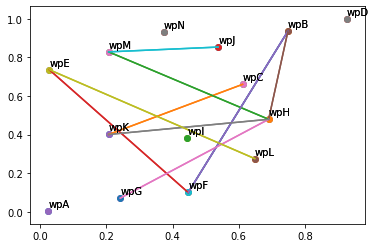

In [32]:
d.plot()

In [33]:
dict1={}
for i in range(len(waypointList)):
    waydict={waypointList[i].name:{
        'x':waypointList[i].x,
        'y':waypointList[i].y}}
    dict1.update(waydict)
dict1

{'wpA': {'x': 0.0252, 'y': 0.005},
 'wpB': {'x': 0.7482, 'y': 0.9356},
 'wpC': {'x': 0.6113, 'y': 0.6602},
 'wpD': {'x': 0.9254, 'y': 0.9973},
 'wpE': {'x': 0.0282, 'y': 0.7361},
 'wpF': {'x': 0.4473, 'y': 0.1004},
 'wpG': {'x': 0.2424, 'y': 0.0713},
 'wpH': {'x': 0.69, 'y': 0.4793},
 'wpI': {'x': 0.4442, 'y': 0.3841},
 'wpJ': {'x': 0.5375, 'y': 0.8532},
 'wpK': {'x': 0.2075, 'y': 0.4009},
 'wpL': {'x': 0.6481, 'y': 0.2758},
 'wpM': {'x': 0.2074, 'y': 0.8284},
 'wpN': {'x': 0.3742, 'y': 0.9306}}

In [34]:
dict2={}
for i in range(len(airwayList)):
    airwaydict= {airwayList[i].name:{
        'start':airwayList[i].start_wp,
        'end' : airwayList[i].end_wp}}
    dict2.update(airwaydict)
dict2

{'wpF - wpB': {'start': 'wpF', 'end': 'wpB'},
 'wpK - wpC': {'start': 'wpK', 'end': 'wpC'},
 'wpM - wpH': {'start': 'wpM', 'end': 'wpH'},
 'wpE - wpF': {'start': 'wpE', 'end': 'wpF'},
 'wpH - wpB': {'start': 'wpH', 'end': 'wpB'},
 'wpG - wpH': {'start': 'wpG', 'end': 'wpH'},
 'wpK - wpH': {'start': 'wpK', 'end': 'wpH'},
 'wpL - wpE': {'start': 'wpL', 'end': 'wpE'},
 'wpJ - wpM': {'start': 'wpJ', 'end': 'wpM'}}

In [35]:
dict3={}
for i in range(len(aircraftList)):
    aircraftdict= {aircraftList[i].name:{
        'x':aircraftList[i].start_wp_x,
        'y':aircraftList[i].start_wp_y,
        'dir_x': aircraftList[i].dir_x,
        'dir_y': aircraftList[i].dir_y
    }}
    dict3.update(aircraftdict)
dict3

{'0': {'x': 0.5375,
  'y': 0.8532,
  'dir_x': -0.9971897265478779,
  'dir_y': -0.07491761653555683},
 '1': {'x': 0.0282,
  'y': 0.7361,
  'dir_x': 0.5504194840099882,
  'dir_y': -0.8348882509786435},
 '2': {'x': 0.4473,
  'y': 0.1004,
  'dir_x': 0.3389468212522851,
  'dir_y': 0.9408055337650664},
 '3': {'x': 0.2075,
  'y': 0.4009,
  'dir_x': 0.9870547587667953,
  'dir_y': 0.1603836126162006},
 '4': {'x': 0.5375,
  'y': 0.8532,
  'dir_x': -0.9971897265478779,
  'dir_y': -0.07491761653555683},
 '5': {'x': 0.2424,
  'y': 0.0713,
  'dir_x': 0.739042878551174,
  'dir_y': 0.6736583879554939},
 '6': {'x': 0.69,
  'y': 0.4793,
  'dir_x': 0.12652265696116677,
  'dir_y': 0.9919637177213121},
 '7': {'x': 0.69,
  'y': 0.4793,
  'dir_x': 0.12652265696116677,
  'dir_y': 0.9919637177213121}}

In [36]:
data_dict={'waypoints':dict1, 'airways':dict2, 'aircraft':dict3}
data_dict

{'waypoints': {'wpA': {'x': 0.0252, 'y': 0.005},
  'wpB': {'x': 0.7482, 'y': 0.9356},
  'wpC': {'x': 0.6113, 'y': 0.6602},
  'wpD': {'x': 0.9254, 'y': 0.9973},
  'wpE': {'x': 0.0282, 'y': 0.7361},
  'wpF': {'x': 0.4473, 'y': 0.1004},
  'wpG': {'x': 0.2424, 'y': 0.0713},
  'wpH': {'x': 0.69, 'y': 0.4793},
  'wpI': {'x': 0.4442, 'y': 0.3841},
  'wpJ': {'x': 0.5375, 'y': 0.8532},
  'wpK': {'x': 0.2075, 'y': 0.4009},
  'wpL': {'x': 0.6481, 'y': 0.2758},
  'wpM': {'x': 0.2074, 'y': 0.8284},
  'wpN': {'x': 0.3742, 'y': 0.9306}},
 'airways': {'wpF - wpB': {'start': 'wpF', 'end': 'wpB'},
  'wpK - wpC': {'start': 'wpK', 'end': 'wpC'},
  'wpM - wpH': {'start': 'wpM', 'end': 'wpH'},
  'wpE - wpF': {'start': 'wpE', 'end': 'wpF'},
  'wpH - wpB': {'start': 'wpH', 'end': 'wpB'},
  'wpG - wpH': {'start': 'wpG', 'end': 'wpH'},
  'wpK - wpH': {'start': 'wpK', 'end': 'wpH'},
  'wpL - wpE': {'start': 'wpL', 'end': 'wpE'},
  'wpJ - wpM': {'start': 'wpJ', 'end': 'wpM'}},
 'aircraft': {'0': {'x': 0.5375,
   

In [37]:
import json

In [38]:
sc1= json.dumps(data_dict)

In [40]:
with open('scenario_test.json', 'w') as json_file:
    json.dump(data_dict, json_file)

In [41]:
aasd=pd.read_json('scenario_test.json')

In [42]:
aasd

,waypoints,airways,aircraft
wpA,"{'x': 0.0252, 'y': 0.005}",NaN,NaN
wpB,"{'x': 0.7482000000000001, 'y': 0.9356000000000...",NaN,NaN
wpC,"{'x': 0.6113000000000001, 'y': 0.6602}",NaN,NaN
wpD,"{'x': 0.9254, 'y': 0.9973000000000001}",NaN,NaN
wpE,"{'x': 0.028200000000000003, 'y': 0.73610000000...",NaN,NaN
wpF,"{'x': 0.44730000000000003, 'y': 0.1004}",NaN,NaN
wpG,"{'x': 0.2424, 'y': 0.0713}",NaN,NaN
wpH,"{'x': 0.6900000000000001, 'y': 0.4793}",NaN,NaN
wpI,"{'x': 0.44420000000000004, 'y': 0.3841}",NaN,NaN
wpJ,"{'x': 0.5375, 'y': 0.8532000000000001}",NaN,NaN
